<a href="https://colab.research.google.com/github/Jafo19D/AllLife-Bank-Credit-Card-Segmentation/blob/main/Olaf_Shibusawa_Twitter_Airline_Sentiment_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Twitter Airline Sentiment Project

##Olaf Shibusawa

Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.



Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").



Dataset:

The dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold
retweet_count
text
tweet_coord
tweet_created
tweet_location
user_timezone

# Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from bs4 import BeautifulSoup

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Read in the dataset
from google.colab import drive
drive.mount ('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/AIML/NLP/Week 2/Tweets.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [3]:
df.tail()

tweet_id airline_sentiment  airline_sentiment_confidence  \
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence   airline  \
14635                     NaN                     0.0000  American   
14636  Customer Service Issue                     1.0000  American   
14637                     NaN                        NaN  American   
14638  Customer Service Issue                     0.6659  American   
14639                     NaN                     0.0000  American   

      airline_sentiment_gold             name negativereason_gold  \
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
14635              0  @AmericanAir thank you we got on a different f...   
14636              0  @AmericanAir leaving over 20 minutes Late Flig...   
14637              0  @AmericanAir Please bring American Airlines to...   
14638              0  @AmericanAir you have my money, you change my ...   
14639              0  @AmericanAir we have 8 ppl so we need 2 know h...   

      tweet_coord              tweet_created tweet_location  \
14635         NaN  2015-02-22 12:01:01 -0800            NaN   
14636         NaN  2015-02-22 11:59:46 -0800          Texas   
14637         NaN  2015-02-22 11:59:15 -0800  Nigeria,lagos   
14638         NaN  2015-02-22 11:59:02 -0800     New Jersey   
14639         NaN  2015-02-22 11:58:51 -0800     dallas, TX   

                    user_timezone  
14635                         NaN  
14636                         NaN  
14637                         NaN  
14638  Eastern Time (US & Canada)  
14639                         NaN

In [4]:
# Check the shape of the data
print("Data shape:", df.shape)

Data shape: (14640, 15)


The Twitter data has 14,640 rows and 15 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

There are 4 numeric columns

There are 11 object columns

In [6]:
df.describe(include='all').T

count unique                         top  \
tweet_id                      14640.0    NaN                         NaN   
airline_sentiment               14640      3                    negative   
airline_sentiment_confidence  14640.0    NaN                         NaN   
negativereason                   9178     10      Customer Service Issue   
negativereason_confidence     10522.0    NaN                         NaN   
airline                         14640      6                      United   
airline_sentiment_gold             40      3                    negative   
name                            14640   7701                 JetBlueNews   
negativereason_gold                32     13      Customer Service Issue   
retweet_count                 14640.0    NaN                         NaN   
text                            14640  14427              @united thanks   
tweet_coord                      1019    832                  [0.0, 0.0]   
tweet_created                   14640  14247   2015-02-24 09:54:34 -0800   
tweet_location                   9907   3081                  Boston, MA   
user_timezone                    9820     85  Eastern Time (US & Canada)   

                              freq                  mean                  std  \
tweet_id                       NaN  569218351767499200.0  779111158481835.875   
airline_sentiment             9178                   NaN                  NaN   
airline_sentiment_confidence   NaN              0.900169              0.16283   
negativereason                2910                   NaN                  NaN   
negativereason_confidence      NaN              0.638298              0.33044   
airline                       3822                   NaN                  NaN   
airline_sentiment_gold          32                   NaN                  NaN   
name                            63                   NaN                  NaN   
negativereason_gold             12                   NaN                  NaN   
retweet_count                  NaN               0.08265             0.745778   
text                             6                   NaN                  NaN   
tweet_coord                    164                   NaN                  NaN   
tweet_created                    5                   NaN                  NaN   
tweet_location                 157                   NaN                  NaN   
user_timezone                 3744                   NaN                  NaN   

                                               min                   25%  \
tweet_id                      567588278875213824.0  568559178101439488.0   
airline_sentiment                              NaN                   NaN   
airline_sentiment_confidence                 0.335                0.6923   
negativereason                                 NaN                   NaN   
negativereason_confidence                      0.0                0.3606   
airline                                        NaN                   NaN   
airline_sentiment_gold                         NaN                   NaN   
name                                           NaN                   NaN   
negativereason_gold                            NaN                   NaN   
retweet_count                                  0.0                   0.0   
text                                           NaN                   NaN   
tweet_coord                                    NaN                   NaN   
tweet_created                                  NaN                   NaN   
tweet_location                                 NaN                   NaN   
user_timezone                                  NaN                   NaN   

                                               50%                   75%  \
tweet_id                      569477857923110912.0  569890473289000960.0   
airline_sentiment                              NaN                   NaN   
airline_sentiment_confidence                   1.0                   1.0 

In [7]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [8]:
# Check for missing values and calculate the percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Display the missing values and their percentage
print("Missing values:")
for column in df.columns:
    print(f"{column}: {missing_values[column]} ({missing_percentage[column]:.2f}%)")

Missing values:
tweet_id: 0 (0.00%)
airline_sentiment: 0 (0.00%)
airline_sentiment_confidence: 0 (0.00%)
negativereason: 5462 (37.31%)
negativereason_confidence: 4118 (28.13%)
airline: 0 (0.00%)
airline_sentiment_gold: 14600 (99.73%)
name: 0 (0.00%)
negativereason_gold: 14608 (99.78%)
retweet_count: 0 (0.00%)
text: 0 (0.00%)
tweet_coord: 13621 (93.04%)
tweet_created: 0 (0.00%)
tweet_location: 4733 (32.33%)
user_timezone: 4820 (32.92%)


airline_sentiment_gold, negativereason_gold and tweet_coord have very large amounts of records with missing data (over 90%).

In [9]:
#Check for dupes
duplicateRows = df[df.duplicated()]
duplicateRows.count()

tweet_id                        36
airline_sentiment               36
airline_sentiment_confidence    36
negativereason                  19
negativereason_confidence       19
airline                         36
airline_sentiment_gold           0
name                            36
negativereason_gold              0
retweet_count                   36
text                            36
tweet_coord                      4
tweet_created                   36
tweet_location                  26
user_timezone                   30
dtype: int64

In [10]:
#drop duplicate records
df.drop_duplicates( keep='first', inplace=True)

In [11]:
# Check the new shape of the data
print("Data shape:", df.shape)

Data shape: (14604, 15)


# EDA

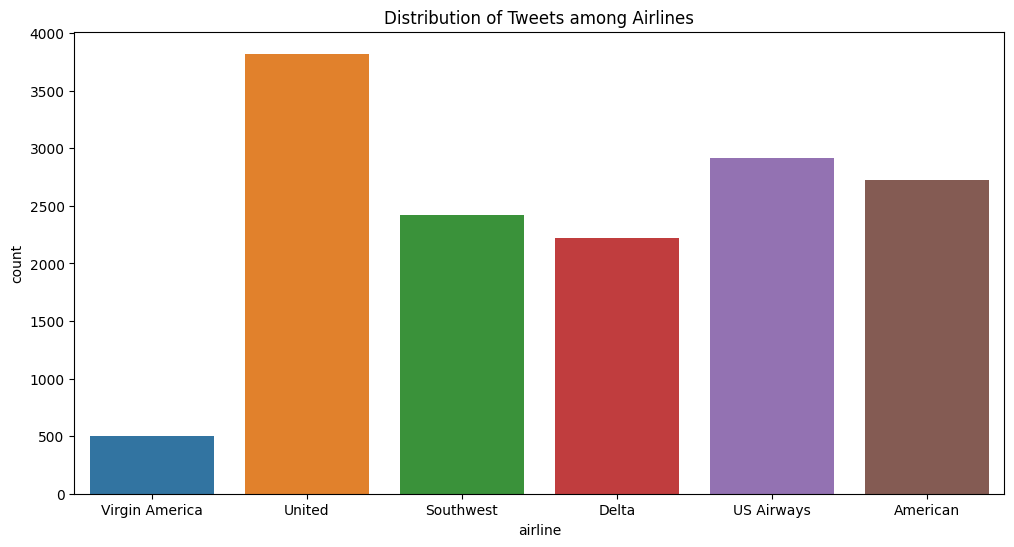

In [12]:
# Plot the distribution of all tweets among each airline
plt.figure(figsize=(12, 6))
sns.countplot(x='airline', data=df)
plt.title("Distribution of Tweets among Airlines")
plt.show()

United (UA) has the biggest share of tweets at 26%.  
Virgina America (VA) has the smallest share of Tweets ar 3%

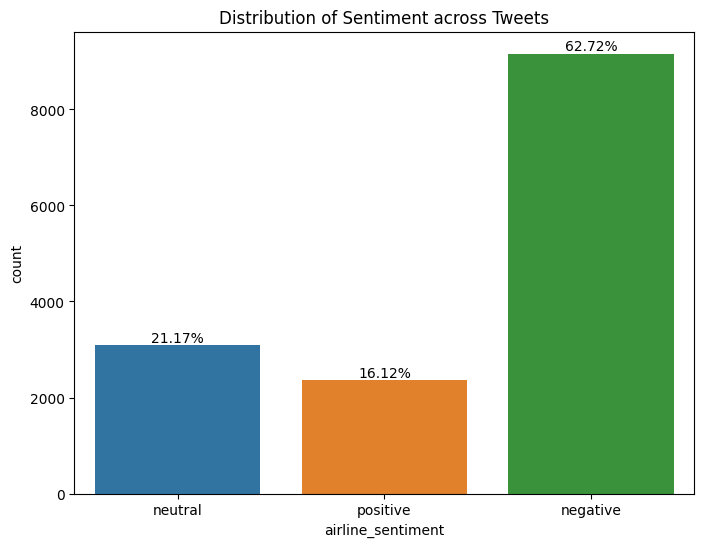

In [13]:
# Plot the distribution of sentiment across all tweets
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='airline_sentiment', data=df)
plt.title("Distribution of Sentiment across Tweets")

total = len(df['airline_sentiment'])
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.text(p.get_x() + p.get_width() / 2, height, percentage, ha='center', va='bottom')

plt.show()

63% of the Tweets across all the airlines are Negatve, 21% are nuetral and 16% are positive

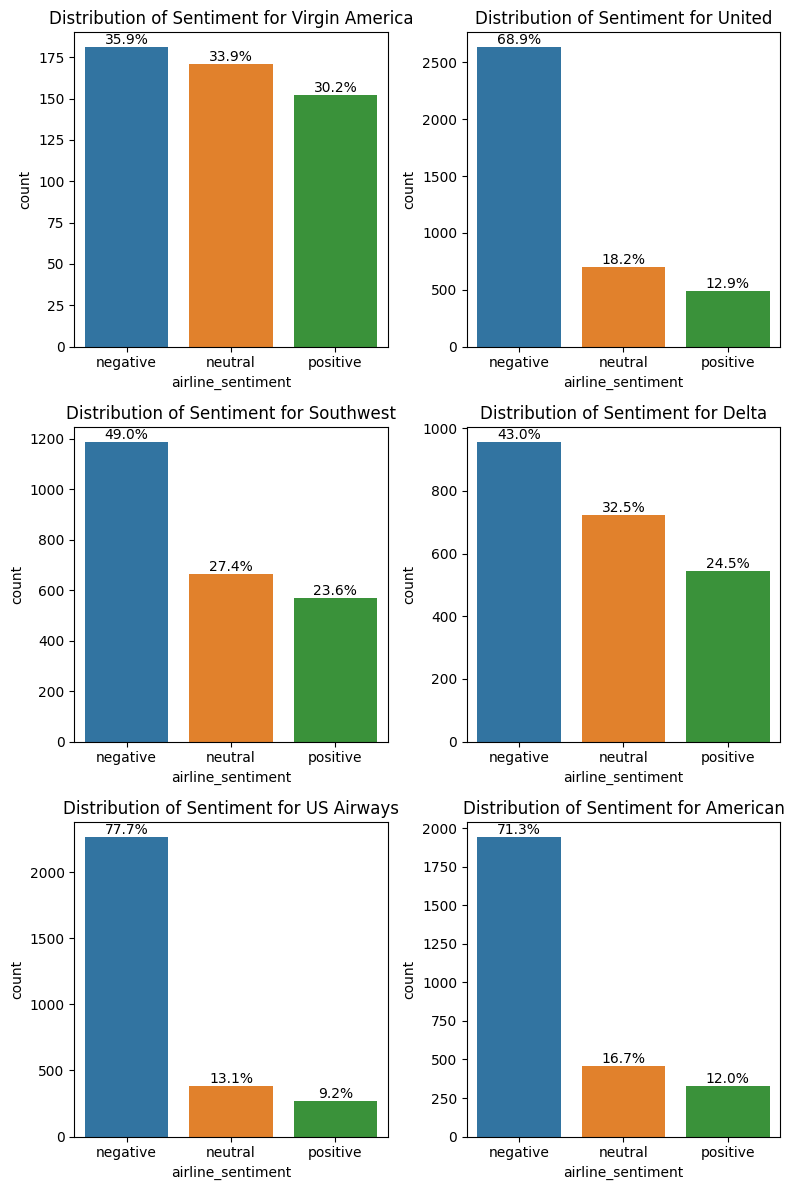

In [14]:
plt.figure(figsize=(8, 12))  # Adjusted figure size

# Get the unique airlines in the dataset
unique_airlines = df['airline'].unique()

# Plot distribution of sentiment for each airline separately
for i, airline in enumerate(unique_airlines):
    plt.subplot(3, 2, i+1)
    subset = df[df['airline'] == airline]
    total_count = len(subset)
    sns.countplot(x='airline_sentiment', data=subset, order=['negative', 'neutral', 'positive'])
    plt.title(f"Distribution of Sentiment for {airline}")

    # Calculate and display percentages in the bar graph
    ax = plt.gca()
    for p in ax.patches:
        percentage = f"{(p.get_height() / total_count) * 100:.1f}%"
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()


With the exception of VA, negative tweets are very dominent.  However for VA the proportion of negative tweets are very close to the positive and neutral tweets.

United has the largest proportion of negative tweets

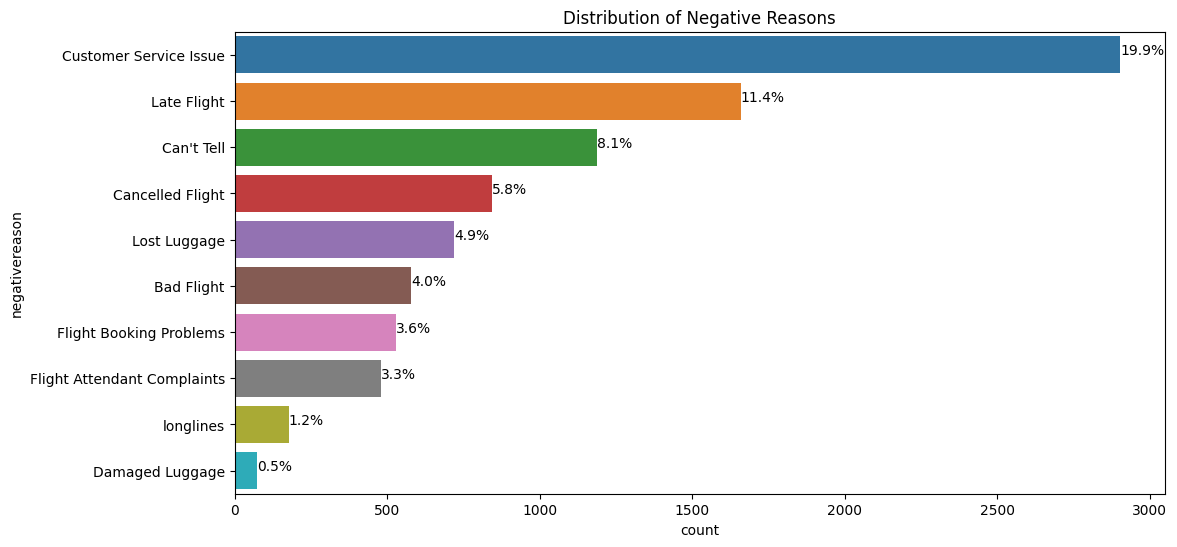

In [15]:
plt.figure(figsize=(12, 6))
total_count = len(df['negativereason'])  # Total count of negative reasons

ax = sns.countplot(y='negativereason', data=df, order=df['negativereason'].value_counts().index)
plt.title("Distribution of Negative Reasons")

# Add percentages to the plot
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total_count)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

plt.show()


Among all the airlines, customer service and late flight were the most numerous negative reasons

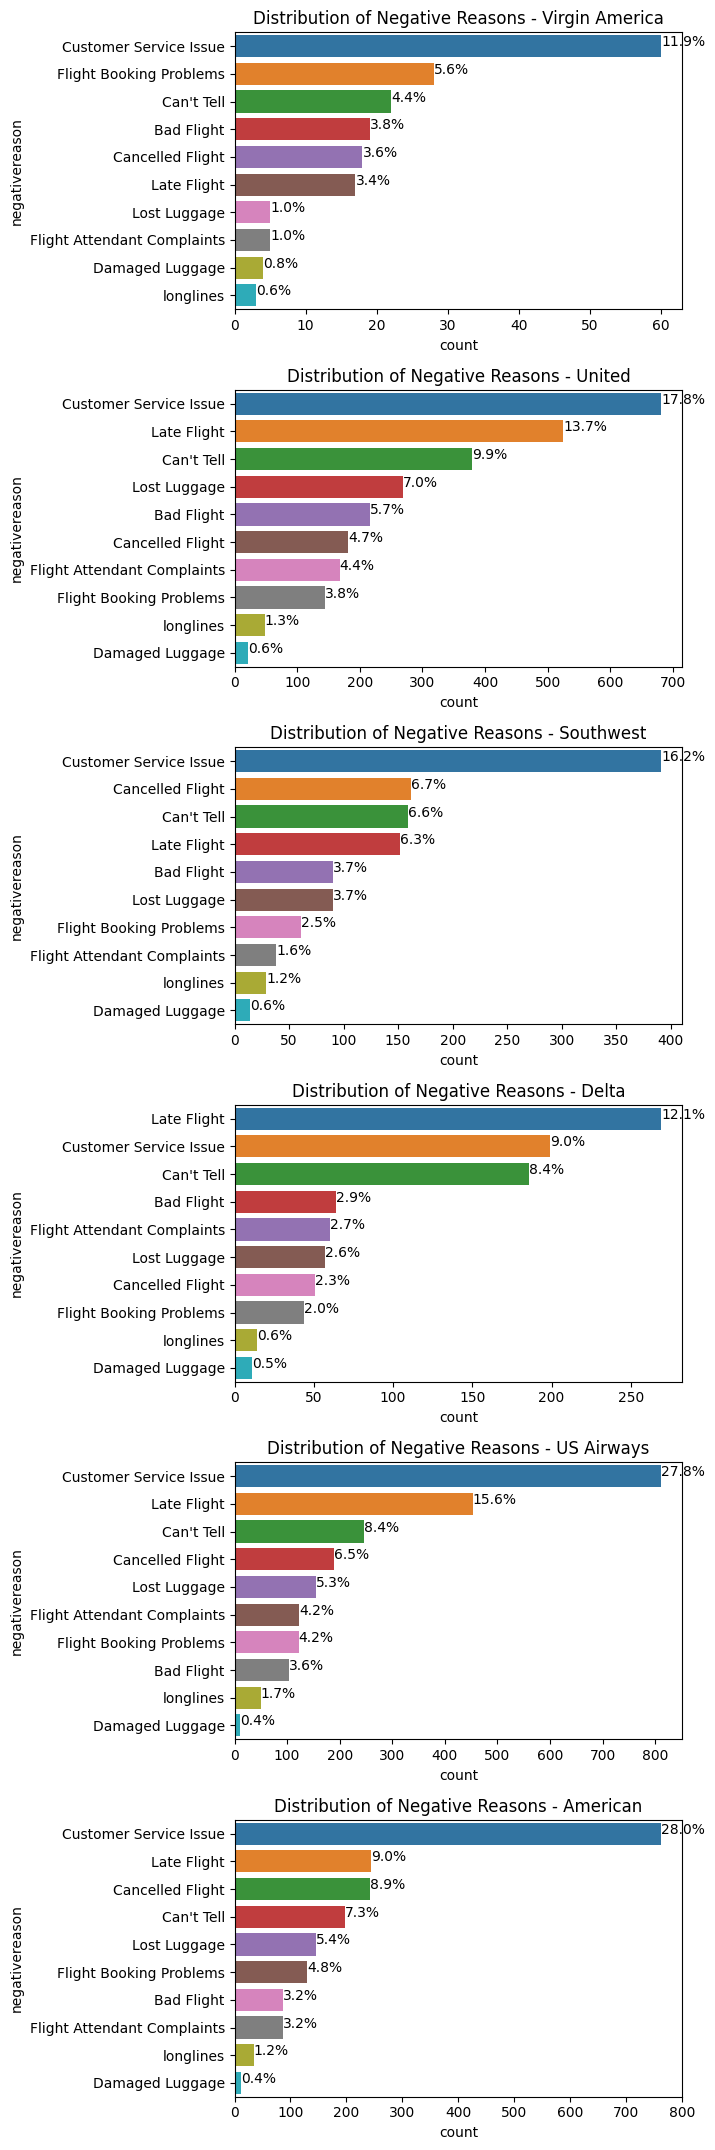

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by airline
grouped_data = df.groupby('airline')

# Get the unique airline names
airline_names = df['airline'].unique()

# Calculate the new figure size
fig_width = 12
fig_height = 6 * len(airline_names)
new_fig_width = fig_width * 0.6
new_fig_height = fig_height * 0.6

# Create subplots for each airline
fig, axes = plt.subplots(len(airline_names), 1, figsize=(new_fig_width, new_fig_height))

# Iterate over the airline names and create a distribution plot for each
for i, airline in enumerate(airline_names):
    ax = axes[i]
    data = grouped_data.get_group(airline)

    ax = sns.countplot(y='negativereason', data=data, order=data['negativereason'].value_counts().index, ax=ax)
    ax.set_title(f"Distribution of Negative Reasons - {airline}")

    # Add percentages to the plot
    total_count = len(data['negativereason'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total_count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


The distribution of negative reasons varies by airline

## Negative Sentiment Word Clouds

In [17]:
# Extracting the negative reviews i.e, sentiment = 0
negative_reviews = data[data['airline_sentiment'] == 'negative']

# joining the negative reviews using space seperator, helps to convert the all rows into one string
words = ' '.join(negative_reviews['text'])

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()])

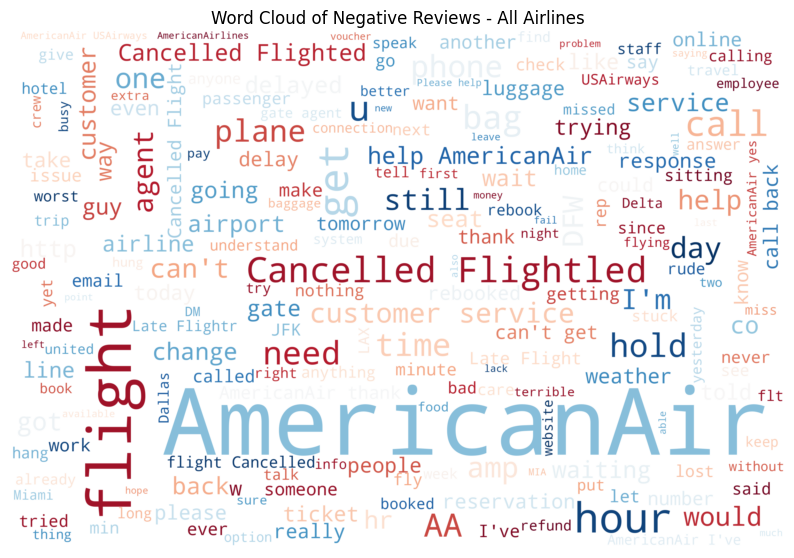

In [18]:
# creating the wordcloud using the WordCloud() method
#nltk.download('stopwords')
# Creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords=stopwords.words('english'),
                      colormap='RdBu',
                      background_color='white',
                      width=3000,
                      height=2000).generate(cleaned_word)

# Display the wordcloud using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Reviews - All Airlines")
plt.show()


Some of the most recurring words for tweets with negative sentiments are AmericanAir, flight and hour

Now lets do this for each airline.

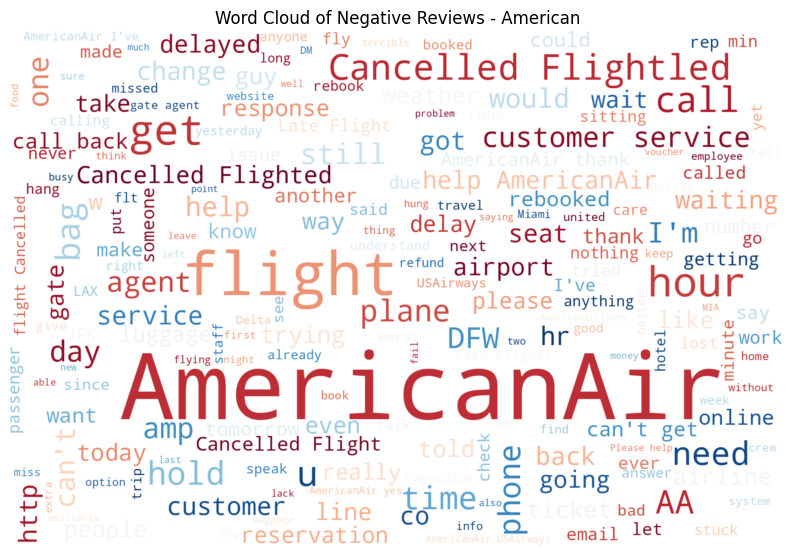

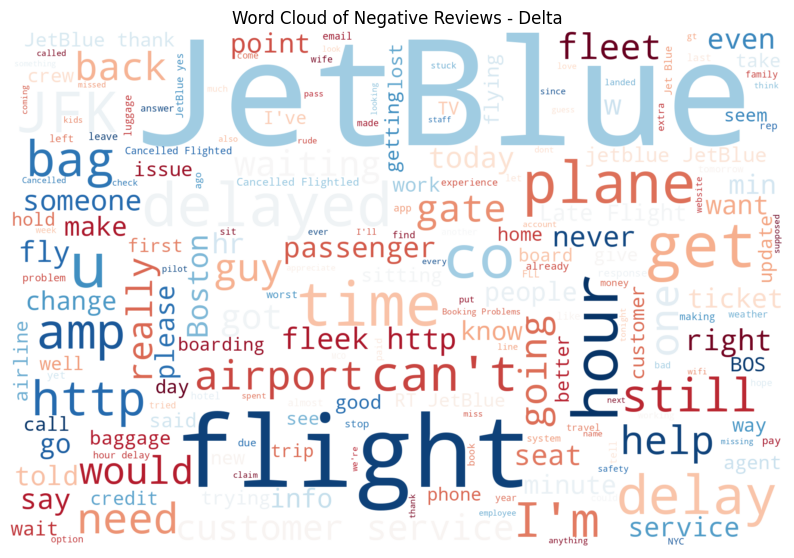

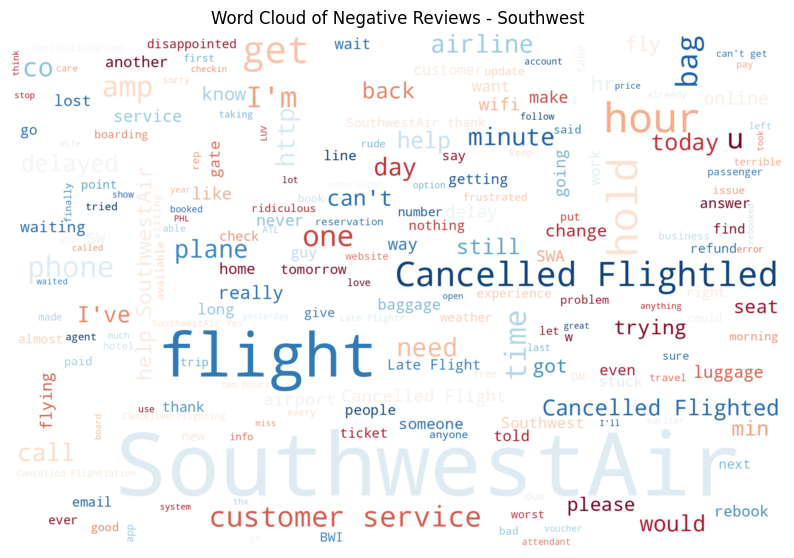

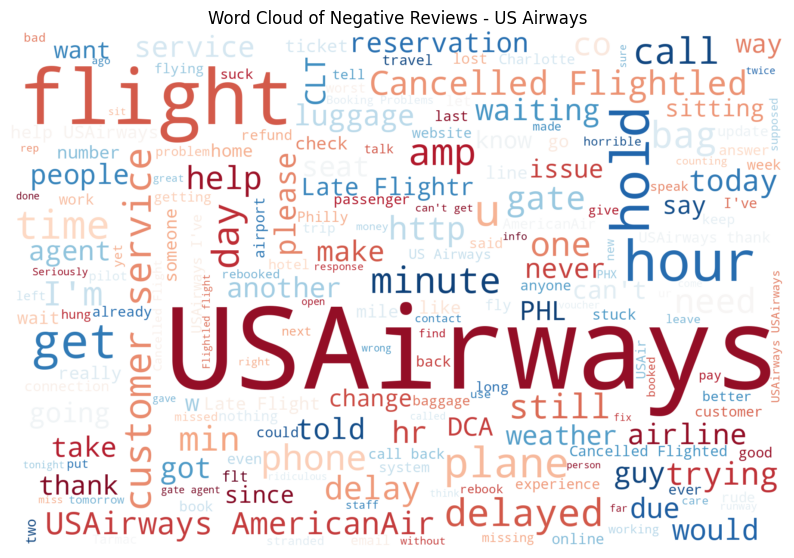

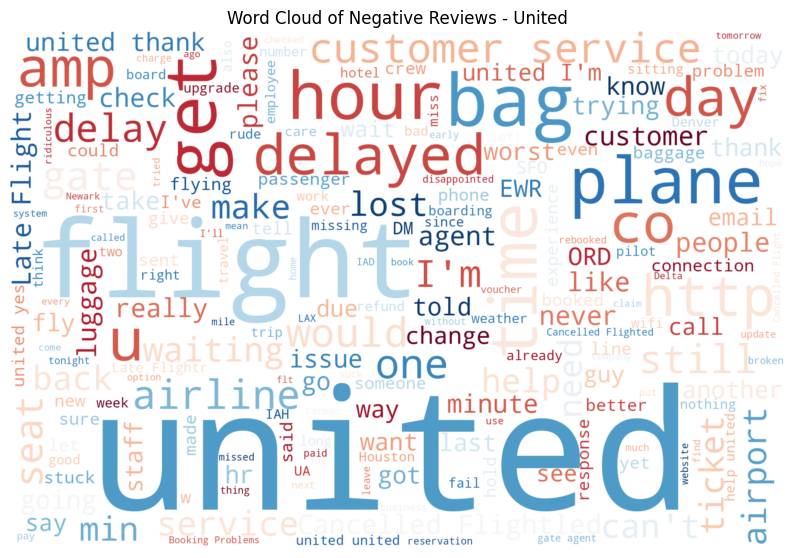

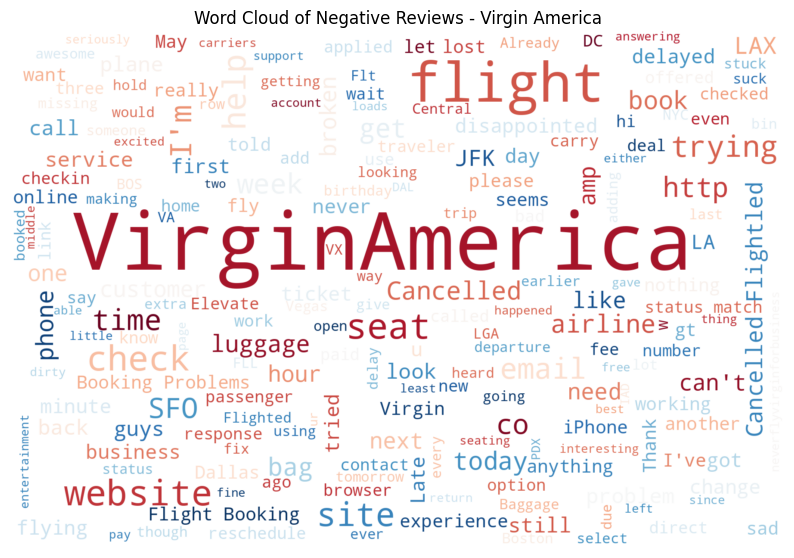

In [19]:
# Group the data by airline
grouped_data = df.groupby('airline')

# Iterate over each airline and create a word cloud
for airline, data in grouped_data:
    # Extract the negative reviews for the current airline
    negative_reviews = data[data['airline_sentiment'] == 'negative']
    words = ' '.join(negative_reviews['text'])
    cleaned_word = " ".join([word for word in words.split()])

    # Creating the word cloud using the WordCloud() method
    wordcloud = WordCloud(stopwords=stopwords.words('english'),
                          colormap='RdBu',
                          background_color='white',
                          width=1800,  # Adjust the width
                          height=1200).generate(cleaned_word)  # Adjust the height

    # Display the word cloud with the airline name as title
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud of Negative Reviews - {airline}")
    plt.show()

As expected the most popular word for each airline is the airline's name except for Delta.

For Delta, the airline's top word is JetBlue.



Lets take some random Delta tweets and see what they look like

In [20]:
import random

# Filter the dataset for tweets related to Delta
delta_tweets = df[df['airline'] == 'Delta']

# Randomly select 30 samples
random_samples = delta_tweets.sample(n=30, random_state=42)

# Print the tweets
for index, row in random_samples.iterrows():
    print(row['text'])
    print('---')

@JetBlue we are missing our connecting transportation in Puerto Rico as a result. Need to get to Vieques today.
---
@JetBlue to offer service from Daytona Beach to New York - Albany Business Review http://t.co/dUhBJ41jHx
---
@JetBlue well I'm glad I got up at 5 am so I can sit in an airport.  No place else I'd rather be (not)
---
@JetBlue loves to respond to positive tweets but they ignore problems w/ customers. Just ask NOLA musician @j_beatz247 about that. #shameful
---
@JetBlue What a great idea! #cometoAustin
---
@JetBlue what a great experience on flight from SFO to JFK; seats, service, food, everything is top quality. I will be back. Very soon!
---
@JetBlue What is going on with the flight from Buffalo to JFK? Have they figured anything out about the temperature and the tower yet?
---
Who did this?!?!“@JetBlue: Our fleet's on fleek. http://t.co/kHZrCCyp2A”
---
@JetBlue It's absolute madness in the west, but tell me who you like between @memgrizz @warriors @spurs and @okcthunder
-

It appears that JetBlue is mislabeled as Delta in the data set.

## Positive Sentiment Word Clouds

In [21]:
# Get the positive reviews
positive_reviews = data[data['airline_sentiment'] == 'positive']

# joining the positive reviews using space seperator, helps to convert the all rows into one string
words = ' '.join(positive_reviews['text'])

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()])

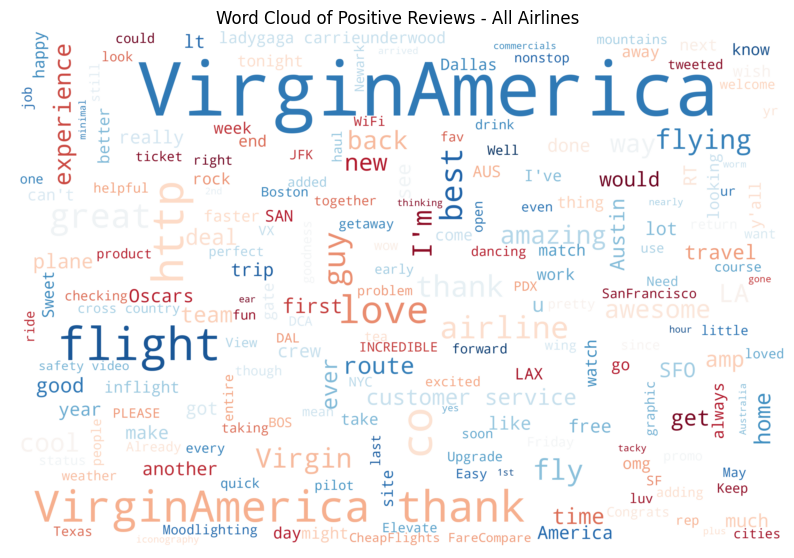

In [22]:
# creating the wordcloud using the WordCloud() method
#nltk.download('stopwords')
# Creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords=stopwords.words('english'),
                      colormap='RdBu',
                      background_color='white',
                      width=3000,
                      height=2000).generate(cleaned_word)

# Display the wordcloud using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews - All Airlines")
plt.show()

Among all airlines the most popular words were VirginAmerica, thank, love and http (this last one needs to be cleaned out)

Now lets do a positive word cloud for each airline

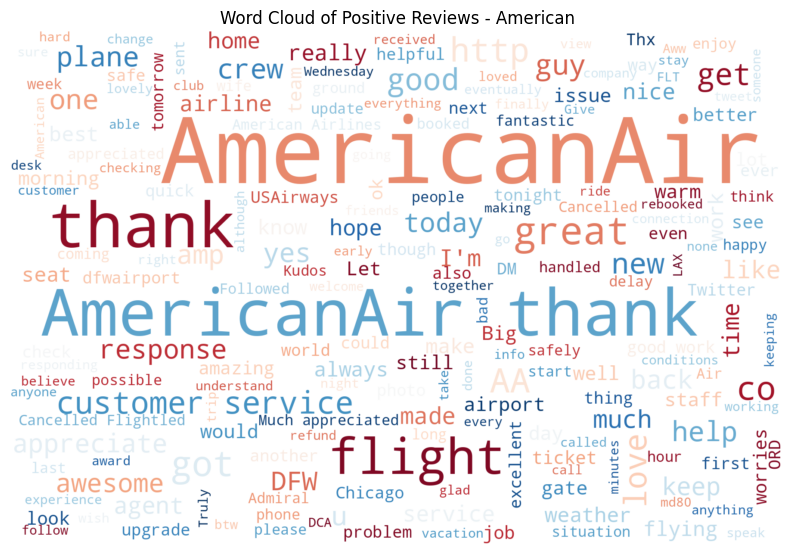

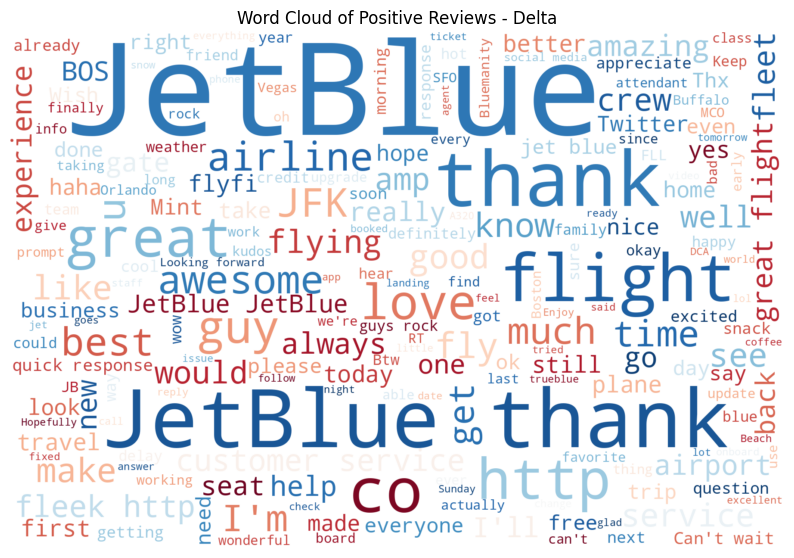

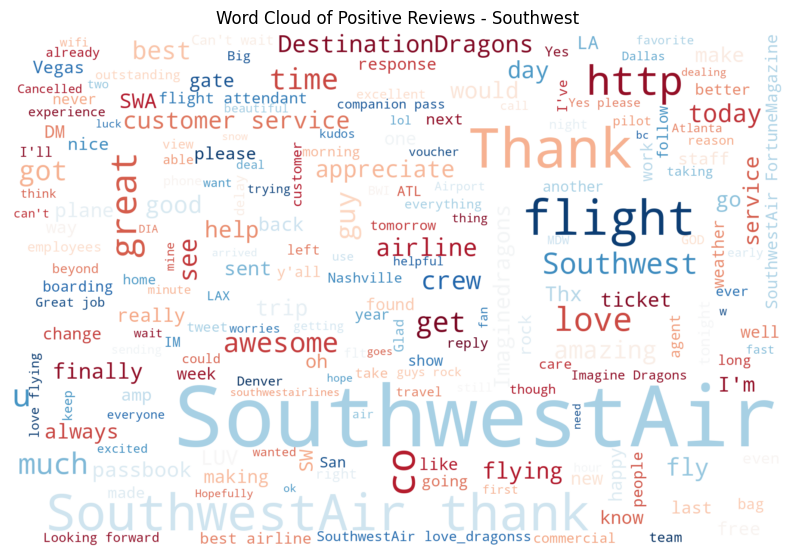

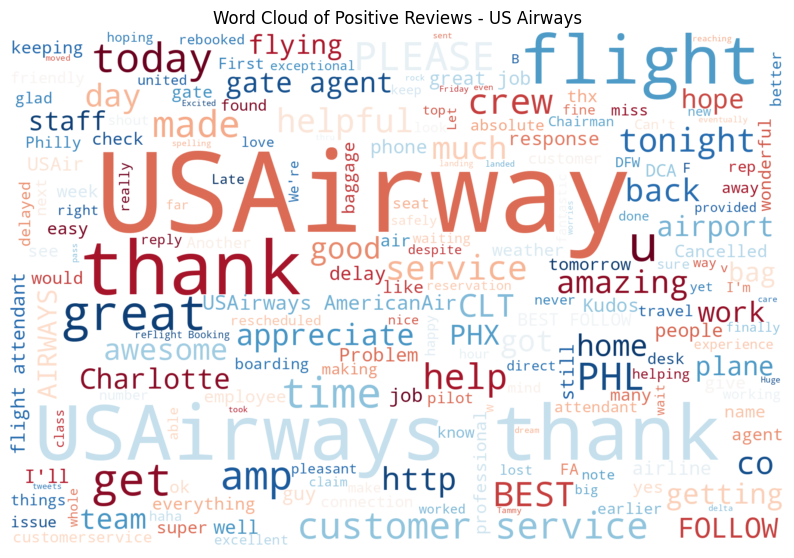

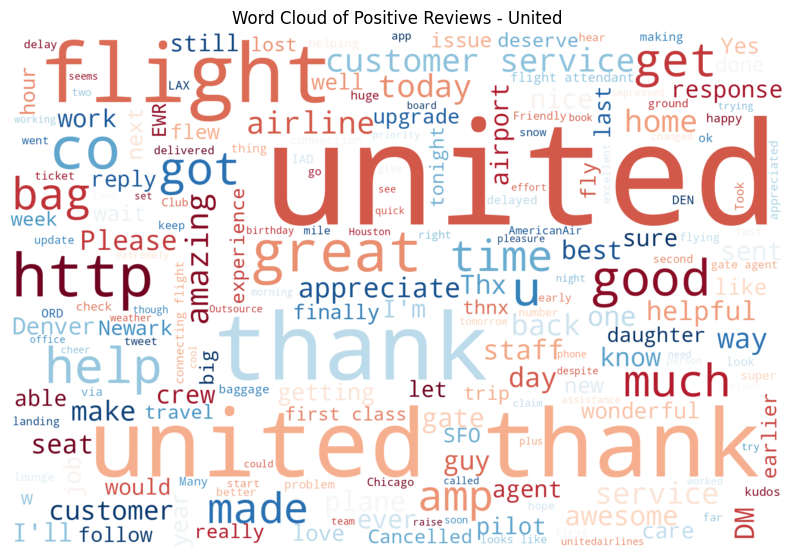

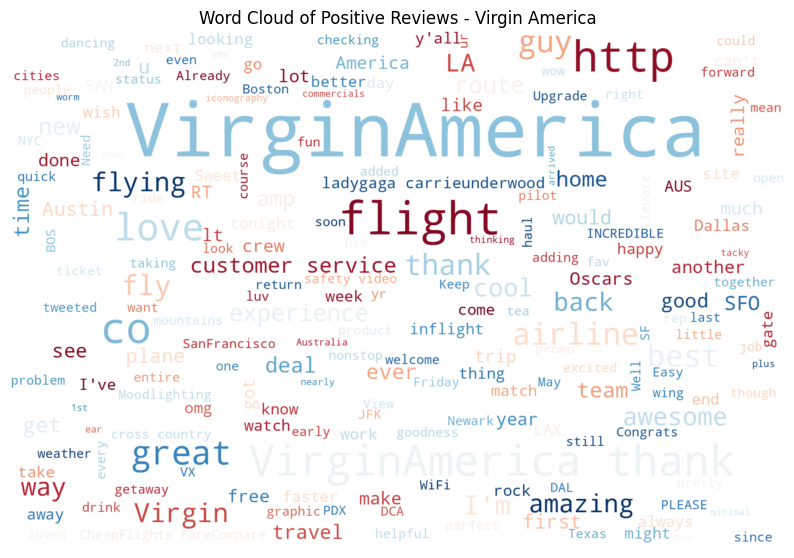

In [23]:
# Group the data by airline
grouped_data = df.groupby('airline')

# Iterate over each airline and create a word cloud
for airline, data in grouped_data:
    # Extract the positive reviews for the current airline
    positive_reviews = data[data['airline_sentiment'] == 'positive']
    words = ' '.join(positive_reviews['text'])
    cleaned_word = " ".join([word for word in words.split()])

    # Creating the word cloud using the WordCloud() method
    wordcloud = WordCloud(stopwords=stopwords.words('english'),
                          colormap='RdBu',
                          background_color='white',
                          width=1800,  # Adjust the width
                          height=1200).generate(cleaned_word)  # Adjust the height

    # Display the word cloud with the airline name as title
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud of Positive Reviews - {airline}")
    plt.show()

For each airline (except Delta which we discussed above), the most popular words for positive sentiment are their own names but followed by this thank is very popular.

Data Treatment

We will drop the following columns


*   tweet_id  - This data point does not add any value to our models
*   airline_sentiment_gold - over 90% of records have this field missing
*   negativereason_gold - over 90% of records have this field missing
*   tweet_coord - over 90% of records have this field missing
*   name  - this is the Twitter handle, does not add any value
*   retweet_count  - for now we will drop it but it might be interesting to leave it in later
*   tweet_location  - Does not add anything to the model
*   user_timezone - Does not add anything to the model
*   tweet_created - Does not add anything to the model
*   airline_sentiment_confidence - There is no data dictionary and not really sure what this is so we will drop it for now.
*   negativereason_confidence - There is no data dictionary and not really sure what this is so we will drop it for now.


In [24]:
# Create the new DataFrame df2 by dropping the above mentioned columns
df2 = df.drop(columns=['tweet_id', 'airline_sentiment_gold', 'negativereason_gold','tweet_coord', 'name', 'retweet_count','tweet_location',
                       'user_timezone','tweet_created','airline_sentiment_confidence','negativereason_confidence'])


In [25]:
print("Data shape of df2:", df2.shape)

Data shape of df2: (14604, 4)


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14604 non-null  object
 1   negativereason     9159 non-null   object
 2   airline            14604 non-null  object
 3   text               14604 non-null  object
dtypes: object(4)
memory usage: 570.5+ KB


In [27]:
# Set the display options
pd.set_option('display.max_colwidth', None)

In [28]:
df2.head(20)

airline_sentiment negativereason         airline  \
0            neutral            NaN  Virgin America   
1           positive            NaN  Virgin America   
2            neutral            NaN  Virgin America   
3           negative     Bad Flight  Virgin America   
4           negative     Can't Tell  Virgin America   
5           negative     Can't Tell  Virgin America   
6           positive            NaN  Virgin America   
7            neutral            NaN  Virgin America   
8           positive            NaN  Virgin America   
9           positive            NaN  Virgin America   
10           neutral            NaN  Virgin America   
11          positive            NaN  Virgin America   
12          positive            NaN  Virgin America   
13          positive            NaN  Virgin America   
14          positive            NaN  Virgin America   
15          negative    Late Flight  Virgin America   
16          positive            NaN  Virgin America   
17          negative     Bad Flight  Virgin America   
18          positive            NaN  Virgin America   
19          positive            NaN  Virgin America   

                                                                                                                                            text  
0                                                                                                            @VirginAmerica What @dhepburn said.  
1                                                                       @VirginAmerica plus you've added commercials to the experience... tacky.  
2                                                                        @VirginAmerica I didn't today... Must mean I need to take another trip!  
3                 @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse  
4                                                                                        @VirginAmerica and it's a really big bad thing about it  
5       @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA  
6                                                                @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)  
7                                   @VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP  
8                                                                                                @virginamerica Well, I didn't…but NOW I DO! :-D  
9                                                               @VirginAmerica it was amazing, and arrived an hour early. You're too good to me.  
10                                               @VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24  
11                                                           @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D  
12   @VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p  
13  @VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn  
14                                                                                                                        @VirginAmerica Thanks!  
15                                                                                                 @VirginAmerica SFO-PDX schedule is still MIA.  
16  @VirginAmerica So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America. #29DaysToGo  
17     @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!  
18                                                    

## Data Pre-Processing

For the modeling we will only keep two variables, the sentiment and a new text field.

For the new text field, which we will name text2, we will concatenate negativereason and text.

In [29]:
df3 = df2.copy()

# Fill missing values in 'negativereason' column with an empty string
df3['negativereason'].fillna('', inplace=True)

# Create 'text2' column by concatenating 'negativereason' and 'text'
df3['text2'] = df3['negativereason'] + " " + df3['text']

# Drop 'negativereason' and 'text' columns from 'df2'
df3 = df3.drop(['negativereason', 'text'], axis=1)

df3.head(20)


airline_sentiment         airline  \
0            neutral  Virgin America   
1           positive  Virgin America   
2            neutral  Virgin America   
3           negative  Virgin America   
4           negative  Virgin America   
5           negative  Virgin America   
6           positive  Virgin America   
7            neutral  Virgin America   
8           positive  Virgin America   
9           positive  Virgin America   
10           neutral  Virgin America   
11          positive  Virgin America   
12          positive  Virgin America   
13          positive  Virgin America   
14          positive  Virgin America   
15          negative  Virgin America   
16          positive  Virgin America   
17          negative  Virgin America   
18          positive  Virgin America   
19          positive  Virgin America   

                                                                                                                                                   text2  
0                                                                                                                    @VirginAmerica What @dhepburn said.  
1                                                                               @VirginAmerica plus you've added commercials to the experience... tacky.  
2                                                                                @VirginAmerica I didn't today... Must mean I need to take another trip!  
3              Bad Flight @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse  
4                                                                                     Can't Tell @VirginAmerica and it's a really big bad thing about it  
5    Can't Tell @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA  
6                                                                        @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)  
7                                           @VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP  
8                                                                                                        @virginamerica Well, I didn't…but NOW I DO! :-D  
9                                                                       @VirginAmerica it was amazing, and arrived an hour early. You're too good to me.  
10                                                       @VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24  
11                                                                   @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D  
12           @VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p  
13          @VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn  
14                                                                                                                                @VirginAmerica Thanks!  
15                                                                                             Late Flight @VirginAmerica SFO-PDX schedule is still MIA.  
16          @VirginAmerica So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America. #29DaysToGo  
17  Bad Flight @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!  
18                                                                                                                       I ❤️ flying @VirginAmerica. ☺️👍  
19                                           @VirginAmerica yo

In [30]:
import re
import contractions
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def clean_text(df, punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~''', use_bs=True):
    """
    A method to clean text
    """
    if use_bs:
        # Cleaning the urls
        string = re.sub(r'https?://\S+|www\.\S+', '', df)

        # Cleaning the html elements
        soup = BeautifulSoup(string, "html.parser")
        string = soup.get_text()
    else:
        string = df

    # Converting the text to lower
    string = string.lower()

    # Tokenize data
    string = word_tokenize(string)

    # Remove numbers
    string = [s for s in string if s.isalpha()]

    # Lemmatize the data
    string = [WordNetLemmatizer().lemmatize(i) for i in string]

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    string = [word for word in string if word not in stop_words]

    # Tokens
    string = ' '.join(string)

    # Fix contractions (example: "'cause": "because","could've": "could have",etc)
    string = contractions.fix(string)

    return string


In [31]:
df3["text2"] = df3["text2"].astype(str)
df3['clean_text'] = df3['text2'].apply(clean_text)

<ipython-input-30-dd3e1248fc87>:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(string, "html.parser")


In [32]:
df3.head(20)

airline_sentiment         airline  \
0            neutral  Virgin America   
1           positive  Virgin America   
2            neutral  Virgin America   
3           negative  Virgin America   
4           negative  Virgin America   
5           negative  Virgin America   
6           positive  Virgin America   
7            neutral  Virgin America   
8           positive  Virgin America   
9           positive  Virgin America   
10           neutral  Virgin America   
11          positive  Virgin America   
12          positive  Virgin America   
13          positive  Virgin America   
14          positive  Virgin America   
15          negative  Virgin America   
16          positive  Virgin America   
17          negative  Virgin America   
18          positive  Virgin America   
19          positive  Virgin America   

                                                                                                                                                   text2  \
0                                                                                                                    @VirginAmerica What @dhepburn said.   
1                                                                               @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                                @VirginAmerica I didn't today... Must mean I need to take another trip!   
3              Bad Flight @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                     Can't Tell @VirginAmerica and it's a really big bad thing about it   
5    Can't Tell @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA   
6                                                                        @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)   
7                                           @VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP   
8                                                                                                        @virginamerica Well, I didn't…but NOW I DO! :-D   
9                                                                       @VirginAmerica it was amazing, and arrived an hour early. You're too good to me.   
10                                                       @VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24   
11                                                                   @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D   
12           @VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p   
13          @VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn   
14                                                                                                                                @VirginAmerica Thanks!   
15                                                                                             Late Flight @VirginAmerica SFO-PDX schedule is still MIA.   
16          @VirginAmerica So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America. #29DaysToGo   
17  Bad Flight @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!   
18                                                                                                                       I ❤️ flying @VirginAmerica. ☺️👍   
19                                        

In [33]:
#Keep only airline_sentiment and  clean_text
df3 = df3.drop(['airline', 'text2'], axis=1)
df3.head(20)


airline_sentiment  \
0            neutral   
1           positive   
2            neutral   
3           negative   
4           negative   
5           negative   
6           positive   
7            neutral   
8           positive   
9           positive   
10           neutral   
11          positive   
12          positive   
13          positive   
14          positive   
15          negative   
16          positive   
17          negative   
18          positive   
19          positive   

                                                                                                       clean_text  
0                                                                                     virginamerica dhepburn said  
1                                                            virginamerica plus added commercial experience tacky  
2                                                            virginamerica today must mean need take another trip  
3             bad flight virginamerica really aggressive blast obnoxious entertainment guest face little recourse  
4                                                                      ca tell virginamerica really big bad thing  
5                        ca tell virginamerica seriously would pay flight seat playing really bad thing flying va  
6                                                     virginamerica yes nearly every time fly vx ear worm go away  
7                                            virginamerica really missed prime opportunity men without hat parody  
8                                                                                              virginamerica well  
9                                                                virginamerica wa amazing arrived hour early good  
10                                             virginamerica know suicide second leading because death among teen  
11                                                   virginamerica pretty graphic much better minimal iconography  
12                                  virginamerica great deal already thinking trip australia even gone trip yet p  
13                            virginamerica virginmedia flying fabulous seductive sky you take stress away travel  
14                                                                                           virginamerica thanks  
15                                                                   late flight virginamerica schedule still mia  
16              virginamerica excited first cross country flight lax mco heard nothing great thing virgin america  
17  bad flight virginamerica flew nyc sfo last week could fully sit seat due two large gentleman either side help  
18                                                                                           flying virginamerica  
19                                                     virginamerica know would amazingly awesome please want fly

In addition to other data cleaning, we now have data without html code, emojis and @ which is common in Twitter

# Our Models

## CountVectorizer AKA Bag of Words

In [34]:
# Vectorization (Convert text data to numbers).
Count_vec = CountVectorizer(max_features = 999999)
data_features = Count_vec.fit_transform(df3['clean_text']).toarray()
# Print the unique words
print("Vocabulary: ", Count_vec.vocabulary_)
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(data_features)

Vocabulary:  {'virginamerica': 9849, 'dhepburn': 2447, 'said': 7831, 'plus': 6850, 'added': 121, 'commercial': 1794, 'experience': 3139, 'tacky': 8910, 'today': 9234, 'must': 5918, 'mean': 5590, 'need': 5997, 'take': 8922, 'another': 428, 'trip': 9380, 'bad': 745, 'flight': 3409, 'really': 7293, 'aggressive': 194, 'blast': 1007, 'obnoxious': 6276, 'entertainment': 2958, 'guest': 3977, 'face': 3192, 'little': 5249, 'recourse': 7347, 'ca': 1302, 'tell': 8998, 'big': 956, 'thing': 9116, 'seriously': 8057, 'would': 10225, 'pay': 6637, 'seat': 7978, 'playing': 6816, 'flying': 3471, 'va': 9751, 'yes': 10298, 'nearly': 5994, 'every': 3055, 'time': 9192, 'fly': 3461, 'vx': 9888, 'ear': 2777, 'worm': 10200, 'go': 3825, 'away': 707, 'missed': 5764, 'prime': 7028, 'opportunity': 6390, 'men': 5646, 'without': 10153, 'hat': 4071, 'parody': 6574, 'well': 10013, 'wa': 9891, 'amazing': 338, 'arrived': 555, 'hour': 4311, 'early': 2780, 'good': 3850, 'know': 5007, 'suicide': 8770, 'second': 7989, 'leadi

In [35]:
# Shape of the feature vector
data_features.shape

(14604, 10362)

I set the max features to 999,999 but the number of unique features is 10,362

In [36]:
X = data_features

y = df3['airline_sentiment']


In [37]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)

# Encoding the target variable
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_test_encoded=enc.transform(y_test)

print("Shape of Training set : ", X_train.shape)

print("Shape of test set : ", X_test.shape)

print("Percentage of classes in training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in test set:")

print(y_test.value_counts(normalize = True))

Shape of Training set :  (10953, 10362)
Shape of test set :  (3651, 10362)
Percentage of classes in training set:
negative    0.627134
neutral     0.211632
positive    0.161234
Name: airline_sentiment, dtype: float64
Percentage of classes in test set:
negative    0.627225
neutral     0.211723
positive    0.161052
Name: airline_sentiment, dtype: float64


Then sentiments in the training and test data sets are similar to each other  

In [38]:
# Train the model

classif = RandomForestClassifier(n_estimators = 200)

classif.fit(X_train, y_train_encoded)

y_pred_test = classif.predict(X_test)


In [39]:
accuracy_score(y_test_encoded, y_pred_test)

0.8726376335250616

In [40]:
# Print the classification report to see how well the model performed on test data
print(classification_report(y_test_encoded, y_pred_test, zero_division=0))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2290
           1       0.83      0.73      0.78       773
           2       0.84      0.57      0.68       588

   micro avg       0.93      0.87      0.90      3651
   macro avg       0.88      0.77      0.82      3651
weighted avg       0.92      0.87      0.89      3651
 samples avg       0.87      0.87      0.87      3651



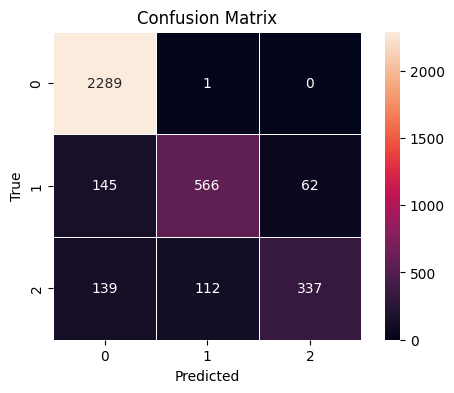

In [41]:
from sklearn.metrics import confusion_matrix

y_pred_arg_2 = np.argmax(y_pred_test, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_arg, y_pred_arg_2)

# Plot the Confusion Matrix
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [42]:
def get_top40_words(model, all_features):
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud
    import numpy as np

    feat = model.feature_importances_
    features = np.argsort(feat)[::-1]

    top_features = ', '.join([all_features[i] for i in features[:40]])

    wordcloud = WordCloud(background_color="white", colormap='viridis', width=2000, height=1000).generate(top_features)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.figure(1, figsize=(14, 11), frameon='equal')
    plt.title('Top 40 features WordCloud', fontsize=10)
    plt.axis("off")
    plt.show()


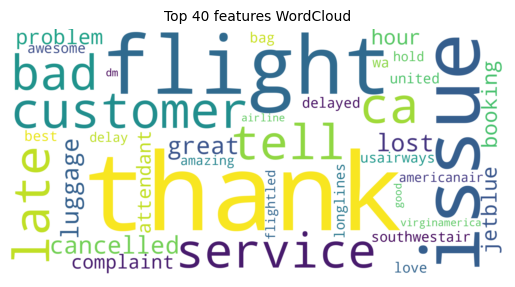

In [43]:
#Get The Top 40 Tokens/Features

features = Count_vec.get_feature_names_out()

get_top40_words(classif,features)


flight, thank, issue, late, and customer are some of the more popular features

## TF-IDF

In [44]:
# Using TfidfVectorizer to convert text data to numbers.
tfidf_vect = TfidfVectorizer(max_features = 10362) #from BoW exercise we know that there are 10,362 features

data_features = tfidf_vect.fit_transform(df3['clean_text'])

data_features = data_features.toarray()

# Feature shape
data_features.shape

(14604, 10362)

In [45]:
X = data_features

y = df3.airline_sentiment

# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

# Encode the target variable
enc1 = LabelBinarizer()
y_train_encoded = enc1.fit_transform(y_train)
y_test_encoded=enc1.transform(y_test)

In [46]:
print("Shape of Training set : ", X_train.shape)

print("Shape of test set : ", X_test.shape)

print("Percentage of classes in training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in test set:")

print(y_test.value_counts(normalize = True))

Shape of Training set :  (10953, 10362)
Shape of test set :  (3651, 10362)
Percentage of classes in training set:
negative    0.627134
neutral     0.211632
positive    0.161234
Name: airline_sentiment, dtype: float64
Percentage of classes in test set:
negative    0.627225
neutral     0.211723
positive    0.161052
Name: airline_sentiment, dtype: float64


We verified that the sentiments distribution in the test and training data sets are practially the same

In [47]:
# Train the model

classif = RandomForestClassifier(n_estimators = 200) #Use the same number of estimators as in BoW

classif.fit(X_train, y_train_encoded)

y_pred_test1 = classif.predict(X_test)





In [48]:
accuracy_score(y_test_encoded, y_pred_test1)

0.8737332237743084

In [49]:
# Let's see how well the model performed on test data
print(classification_report(y_test_encoded, y_pred_test1, zero_division=0))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2290
           1       0.84      0.72      0.77       773
           2       0.89      0.59      0.71       588

   micro avg       0.93      0.87      0.90      3651
   macro avg       0.90      0.77      0.82      3651
weighted avg       0.92      0.87      0.89      3651
 samples avg       0.87      0.87      0.87      3651



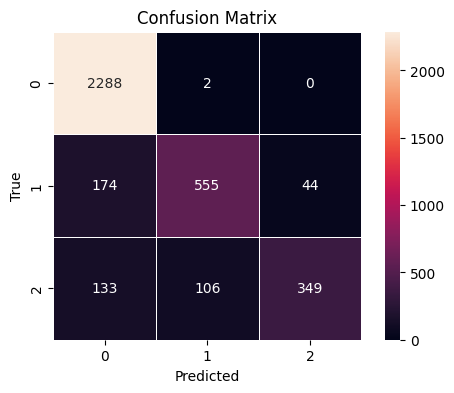

In [50]:
from sklearn.metrics import confusion_matrix

y_pred_arg_2 = np.argmax(y_pred_test1, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_arg, y_pred_arg_2)

# Plot the Confusion Matrix
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

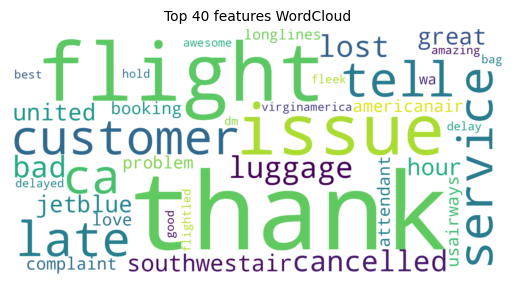

In [51]:
#Get The Top 40 Tokens/Features

features = Count_vec.get_feature_names_out()

get_top40_words(classif,features)

thank, flight, issue, tell, service, customer are some of the more popular features

# Conclusion and Model Comparison - Which One Performed Better?  

The main differences between TF-IDF (Term Frequency-Inverse Document Frequency) and Bag of Words (BoW) are as follows:

1. TF-IDF considers not only the frequency of words (term frequency) but also their importance in the entire corpus (inverse document frequency). It assigns higher weights to words that are more informative across the corpus.

2. BoW represents text as a collection of word frequencies without considering the relative importance of words. It simply counts the occurrences of words in a document and creates a vector representation.

3. TF-IDF is useful for capturing the significance of words in a document compared to the entire corpus, making it suitable for tasks like text classification and information retrieval. BoW, on the other hand, is a simpler representation that can be used for tasks like document clustering or basic text analysis.

Overall, TF-IDF takes into account both local and global word frequencies, providing a more nuanced representation of text compared to the straightforward frequency-based representation of BoW.

Both models had an accuracy of 87% for recall but the TF-IDF was slightly better than Bag of Words for Precision (92% vs 91%) and F1 Score (89% vs 88%)

We should keep in mind that the data seems to have some data integrity issues because Delta really appears to be Jet Blue